In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

ds = pd.read_csv('Assignment 4v2.csv', sep=',')
ds = ds.dropna()
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [2]:
ds.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.009124,0.001206,0.004058,0.006252,0.003238,0.004878
age,0.009124,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.001206,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.004058,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.006252,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.003238,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.004878,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


Zoals hierboven te zien zijn de twee data kolommen die het meest correleren met 'stroke' de datakolommen 'age' en 'hypertension'. Om te kijken of er verschillen zijn tussen de uitkomsten van de data wanneer we data hebben die een gelijkwaardige verhouding hebben van mensen die wel en geen stroke hebben gekregen, zal hieronder de dataset weer kleiner gemaak worden tot een kleinere dataframe en zal er gekeken worden of er dan andere uitkomsten uitkomen qua relaties. 

In [3]:
stroke = ds[ds['stroke'] == 1]
noStroke = ds[ds['stroke'] == 0]
display(stroke)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


Zoals hierboven te zien is, zijn er 209 resultaten waar mensen een stroke hebben gekregen en zal de dataframe van mensen die geen stroke hebben gehad ook 209 resultaten bevatten.

In [4]:
noStroke = noStroke.sample(n=209, random_state=1)
frames = [stroke, noStroke]
df = pd.concat(frames)
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4927,65469,Male,11.0,0,0,No,children,Rural,121.71,23.4,never smoked,0
352,40670,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked,0
1590,1625,Female,13.0,0,0,No,children,Urban,99.13,22.8,Unknown,0
2659,70886,Female,7.0,0,0,No,children,Rural,114.82,33.3,Unknown,0


In [5]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.000420,0.013118,0.033942,0.080108,0.103075,0.031217
age,-0.000420,1.000000,0.290638,0.277991,0.304698,0.113221,0.614107
hypertension,0.013118,0.290638,1.000000,0.079942,0.163755,0.169074,0.257907
heart_disease,0.033942,0.277991,0.079942,1.000000,0.250100,0.028133,0.202963
avg_glucose_level,0.080108,0.304698,0.163755,0.250100,1.000000,0.182024,0.243608
bmi,0.103075,0.113221,0.169074,0.028133,0.182024,1.000000,0.060671
stroke,0.031217,0.614107,0.257907,0.202963,0.243608,0.060671,1.000000


Zoals eerder verwacht, zijn de resultaten van de correlations nu anders dan wanneer de volledige dataset gebruikt zou worden. De datakolom 'age' heeft nu een veel sterkere relatie met de kolom 'stroke' dan eerder. De datakolommen 'hypertension' en 'avg_glucose_level' hebben nog steeds de sterkste relatie met de kolom 'stroke', net zoals wanneer de hele dataset wordt gebruikt, alleen is de correlation nu aanzienlijk sterker geworden.

Omdat dit nu is vastgesteld, zal in de rest van dit notebook ook de dataframe gebruikt worden i.p.v. de gehele dataset. Dit omdat ik persoonlijk verwacht dat dit wat duidelijkere resultaten zal geven als wanneer de gehele dataset gebruikt zal worden.

## Splitting the data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [7]:
stroke_train, stroke_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['stroke'])
print(stroke_train.shape, stroke_test.shape)

(292, 12) (126, 12)


In [8]:
features= ['avg_glucose_level', 'age']
dt_regression = DecisionTreeRegressor(max_depth = 4)
dt_regression.fit(stroke_train[features], stroke_train['stroke'])

DecisionTreeRegressor(max_depth=4)

In [9]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

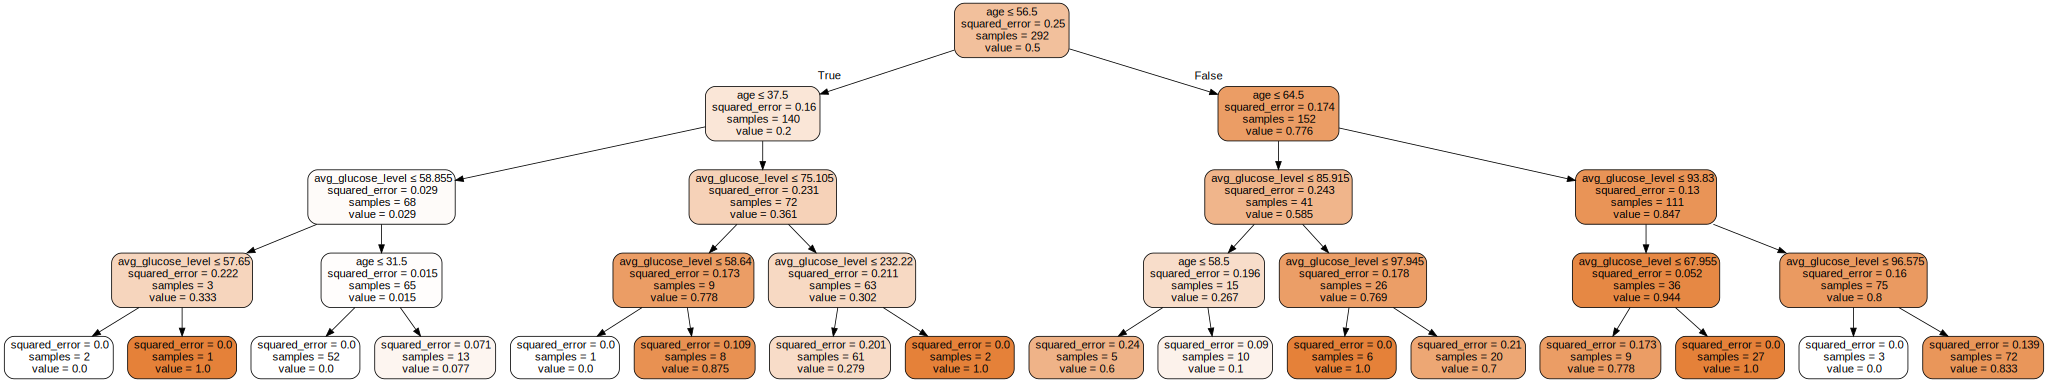

In [10]:
plot_tree_regression(dt_regression, features)

## Evaluating the model

In [11]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [12]:
predictionsOnTrainset = dt_regression.predict(stroke_train[features])
predictionsOnTestset = dt_regression.predict(stroke_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, stroke_train.stroke)
rmseTest = calculate_rmse(predictionsOnTestset, stroke_test.stroke)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.33060720165004825
RMSE on test set 0.46019306480645417


Er is een klein verschil tussen de RMSE op de trainingset en de testset. Persoonlijk had ik verwacht dat het verschil groter zou zijn aangezien de testset minder data bevat en dus grotere verschillen qua data bevat waardoor de RMSE hoger zou zijn als wanneer de dataframe net zoveel data zou bevatten als de trainingset.